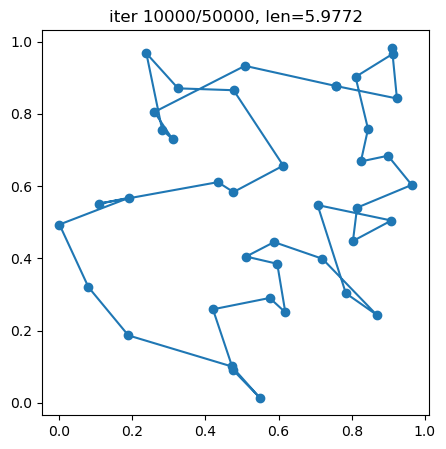

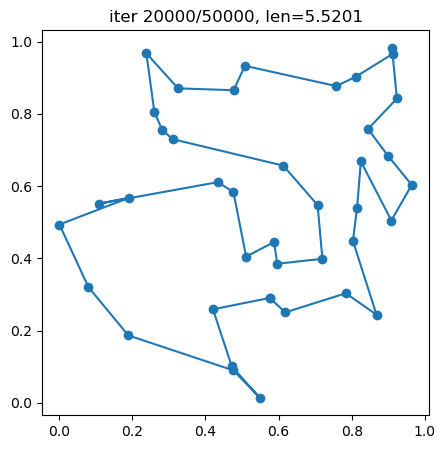

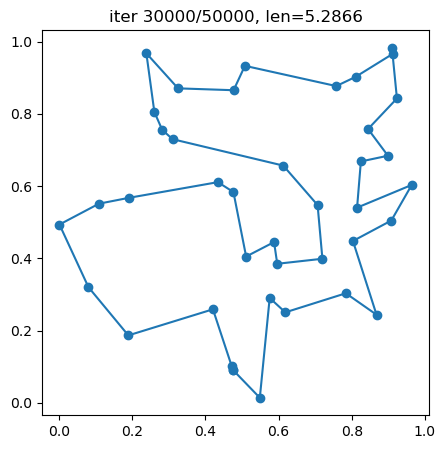

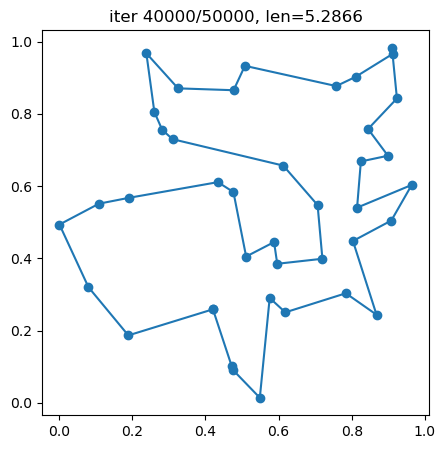

final length: 5.286561804047822


In [1]:
import random, math
import matplotlib.pyplot as plt

def tsp_2opt_sa(coords, iters=200000, steps=5, T0=0.3, Tend=1e-4, seed=0):
    rng = random.Random(seed)
    n = len(coords)

    # 距離行列
    dist = [[0]*n for _ in range(n)]
    for i,(xi,yi) in enumerate(coords):
        for j,(xj,yj) in enumerate(coords):
            dist[i][j] = ((xi-xj)**2 + (yi-yj)**2)**0.5

    def tour_len(t):
        return sum(dist[t[i]][t[(i+1)%n]] for i in range(n))

    # 初期解
    tour = list(range(n)); rng.shuffle(tour)
    best, bestL = tour[:], tour_len(tour)

    # 温度
    alpha = (Tend/T0)**(1/(iters-1))
    T = T0

    # 途中表示インデックス
    marks = { int(iters*(k/steps)) for k in range(1, steps+1) }

    for it in range(iters):
        i, k = sorted(rng.sample(range(n), 2))
        if k == i+1:
            T *= alpha; continue

        a, b = tour[i-1], tour[i]
        c, d = tour[k], tour[(k+1)%n]
        dE = (dist[a][c] + dist[b][d]) - (dist[a][b] + dist[c][d])

        if dE < 0 or rng.random() < math.exp(-dE/T):
            tour[i:k+1] = reversed(tour[i:k+1])

        # ベスト更新
        L = tour_len(tour)
        if L < bestL:
            bestL = L
            best = tour[:]

        # ✔ 途中経過表示
        if it in marks:
            plot_tour(coords, best, f"iter {it}/{iters}, len={bestL:.4f}")

        T *= alpha

    return best, bestL

def plot_tour(coords, tour, title):
    xs = [coords[i][0] for i in tour] + [coords[tour[0]][0]]
    ys = [coords[i][1] for i in tour] + [coords[tour[0]][1]]
    plt.figure(figsize=(5,5))
    plt.plot(xs, ys, "-o")
    plt.title(title)
    plt.show()


# ---------------- 実行例 ----------------
if __name__ == "__main__":
    random.seed(0)
    coords = [(random.random(), random.random()) for _ in range(40)]

    # steps=5 → 5回途中経過が出る
    tour, length = tsp_2opt_sa(coords, iters=50000, steps=5)
    print("final length:", length)
